> *Alberto Ferrari* - [github](https://albertoferrari.github.io/)

In [1]:
from sklearn.datasets import load_iris      # caricamento dataset iris
import pandas as pd                         # librerie 
import matplotlib.pyplot as plt
import numpy as np
iris = load_iris()

### analisi 2d con le ultime due features

In [2]:
X = iris.data[:, 2:]  # solo le ultime due features
y = iris.target

## visualizzazione dei dati (grafico 2d)

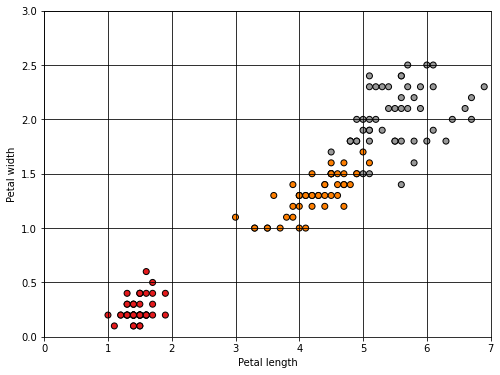

In [3]:
plt.figure(2, figsize=(8, 6))

plt.rc('grid', linestyle="-", color='black')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')

x_min = y_min = 0
x_max = 7
y_max = 3
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.grid(True)
plt.show()

## Decision tree
### albero di decisione

In [4]:
from sklearn import tree
classificatore = tree.DecisionTreeClassifier()
# generazione del classificatore
classificatore = classificatore.fit(X, y)                     

### visualizzazione dell'albero di decisione generato

[Text(334.8, 398.64, 'X[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(273.92727272727274, 326.15999999999997, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(395.6727272727273, 326.15999999999997, 'X[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(243.4909090909091, 253.67999999999998, 'X[0] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(121.74545454545455, 181.2, 'X[1] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(60.872727272727275, 108.71999999999997, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(182.61818181818182, 108.71999999999997, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(365.23636363636365, 181.2, 'X[1] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(304.3636363636364, 108.71999999999997, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(426.1090909090909, 108.71999999999997, 'X[0] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(365.2363

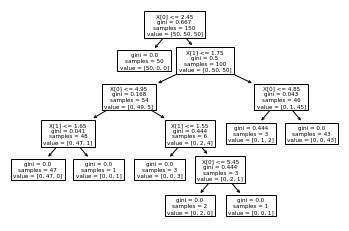

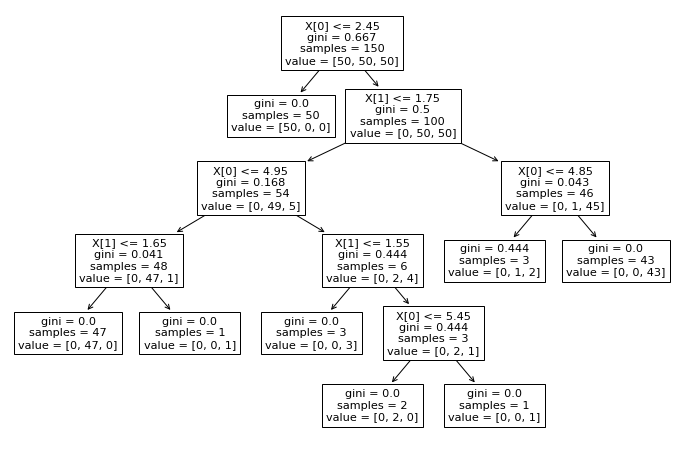

In [5]:
tree.plot_tree(classificatore.fit(X, y)) 
figura = classificatore.fit(X,y)
plt.figure(figsize=(12,8))
tree.plot_tree(figura)


In [6]:
from sklearn.tree import export_text

In [7]:
tree_rules = export_text(classificatore, feature_names=['petal_length', 'petal_width'])
for elem in tree_rules.split("\n"):
    print(elem)

|--- petal_length <= 2.45
|   |--- class: 0
|--- petal_length >  2.45
|   |--- petal_width <= 1.75
|   |   |--- petal_length <= 4.95
|   |   |   |--- petal_width <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal_width >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal_length >  4.95
|   |   |   |--- petal_width <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal_width >  1.55
|   |   |   |   |--- petal_length <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal_length >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal_width >  1.75
|   |   |--- petal_length <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal_length >  4.85
|   |   |   |--- class: 2



### definito il classificatore 
#### si può utilizzare per predire la classe associata a un nuovo oggetto
#### visualizzando anche la probabilità di appartenenza alle varie classi

In [8]:
previsione = classificatore.predict([[5.0, 1.6]])
print(previsione[0])
nome_classe = iris['target_names'][previsione[0]]
print(nome_classe)
probabilità = classificatore.predict_proba([[5.0, 1.6]])
print(probabilità)

1
versicolor
[[0. 1. 0.]]


In [9]:
previsione = classificatore.predict([[4.2, 2]])
print(previsione[0])
nome_classe = iris['target_names'][previsione[0]]
print(nome_classe)
probabilità = classificatore.predict_proba([[4.2, 2]])
print(probabilità)

2
virginica
[[0.         0.33333333 0.66666667]]
